# **Exploratory Data Analysis**

### Librerías

In [2]:
"""Librerías que pueden ser necesarias"""

# Manejo de datos
import pandas as pd                 # Análisis y manipulación de datos en tablas
import numpy as np                  # Cálculos numéricos y matrices
import os                           # Gestión de rutas de archivos

# Visualización de datos
import matplotlib.pyplot as plt     # Gráficos básicos en 2D
import seaborn as sns               # Gráficos estadísticos mejorados
import plotly.express as px         # Gráficos interactivos simplificados
import plotly.graph_objects as go   # Control avanzado de gráficos en Plotly
import plotly.io as pio             # Interfaz de entrada/salida de Plotly
import squarify                     # Visualización de diagramas de "treemap"

### Carga de datos

In [3]:
df_original_250519 = pd.read_csv("../Data/df_original_250519.csv")
df_original_250519.head(5)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,2,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
2,3,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
3,4,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
4,5,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes


## **1. Descripción general de los datos**

Campaña de marketing de un banco portugués para predecir si un cliente se subscribirá a un plazo fijo.

Promoción de plazos fijos por llamada telefónica.

- Filas: 11163 clientes
- Columnas:
    - **'id', 'age', 'job', 'marital', 'education'**: id, edad, tipo de empleo, estado civil, nivel educativo → **Características personales del cliente**
    - **'default', 'balance', 'housing', 'loan'**: impagos, saldo medio anual, hipoteca, préstamos → **Características de las finanzas del cliente**
    - **'contact', 'day', 'month', 'duration', 'campaign'**: tipo de llamada, día, mes, duración de la llamada y número de contactos→ **Características del contacto realizado al cliente en la campaña actual**
    - **'pdays', 'previous', 'poutcome'**: días desde el último contacto, número de contactos en campañas anteriores, resultado de campaña anterior → **Características campañas anteriores**
    - **'deposit'**: resultado de la campaña actual → **Objetivo**

Información extraída:
- **Age**: 18 - 95 años. 10 nulos
- **Balance**: -6847 - 81204 €
- **Day**: 1 - 31 (días del mes)
- **Duration**: 2 - 3881 s de llamada
- **Campaign**: entre 1 y 63 contactos por cliente en esta campaña
- **Pdays**: -1 sin contacto previo. Entre -1 - 854 días del último contacto en esta campaña
- **Previous**: entre 0 - 68 contactos en campañas anteriores

In [4]:
df_original_250519.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16173 entries, 0 to 16172
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         16173 non-null  int64  
 1   age        16160 non-null  float64
 2   job        16173 non-null  object 
 3   marital    16164 non-null  object 
 4   education  16163 non-null  object 
 5   default    16173 non-null  object 
 6   balance    16173 non-null  int64  
 7   housing    16153 non-null  object 
 8   loan       16173 non-null  object 
 9   contact    16173 non-null  object 
 10  day        16173 non-null  int64  
 11  month      16173 non-null  object 
 12  duration   16173 non-null  int64  
 13  campaign   16173 non-null  int64  
 14  pdays      16173 non-null  int64  
 15  previous   16173 non-null  int64  
 16  poutcome   16173 non-null  object 
 17  deposit    16173 non-null  object 
dtypes: float64(1), int64(7), object(10)
memory usage: 2.2+ MB


1 float → cambiar age a int

7 int → id y day son en realidad texto, solo 5 numéricas

10 object → 9 variables categóricas + deposit

In [5]:
df_original_250519.shape       # (filas, columnas)

"""11163 clientes y 18 variables analizadas"""

'11163 clientes y 18 variables analizadas'

In [6]:
df_original_250519.describe()

,id,age,balance,day,duration,campaign,pdays,previous
count,16173.000000,16160.000000,16173.000000,16173.000000,16173.000000,16173.000000,16173.000000,16173.000000
mean,9697.752180,41.172958,1513.235207,15.650034,373.960984,2.506338,51.685649,0.846720
std,6754.578481,11.913481,3123.897733,8.418871,349.787596,2.736112,109.264465,2.376494
min,1.000000,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,4042.000000,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,8083.000000,39.000000,550.000000,15.000000,256.000000,2.000000,-1.000000,0.000000
75%,17344.000000,49.000000,1693.000000,22.000000,499.000000,3.000000,31.000000,1.000000
max,21383.000000,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
df_original_250519.isnull().sum()

id            0
age          13
job           0
marital       9
education    10
default       0
balance       0
housing      20
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

## **2. Análisis univariado**

### Características personales

##### Age

<Axes: >

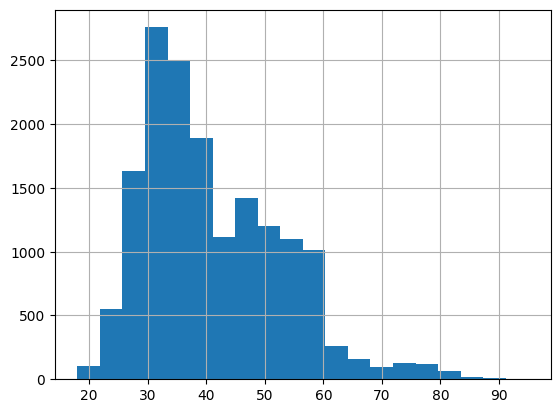

In [8]:
df_original_250519['age'].hist(bins=20)

count    16160.000000
mean        41.172958
std         11.913481
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64


<Axes: >

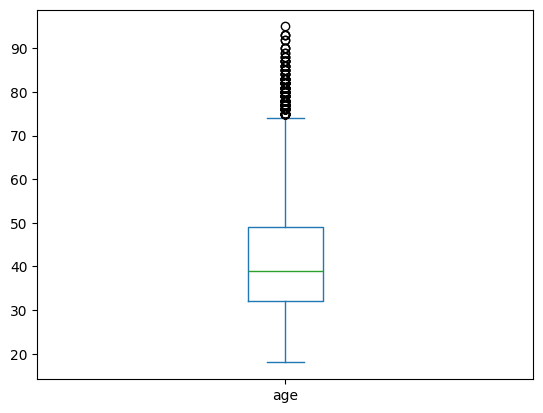

In [9]:
print(df_original_250519['age'].describe())
df_original_250519['age'].plot.box()

##### Job

job
management       3715
blue-collar      2860
technician       2645
admin.           1930
services         1315
retired          1123
self-employed     577
student           522
unemployed        506
entrepreneur      476
housemaid         401
unknown           103
Name: count, dtype: int64


<Axes: xlabel='job'>

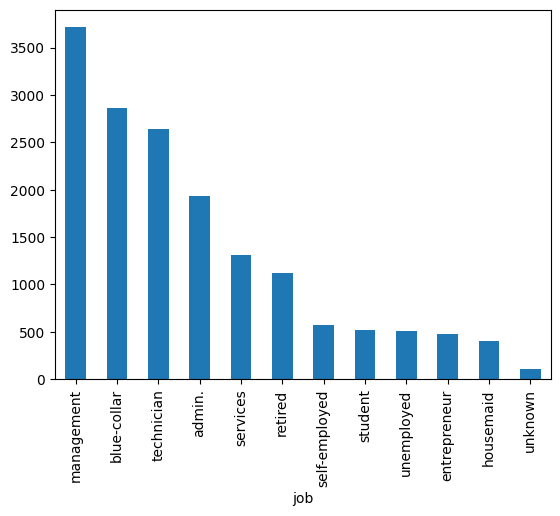

In [10]:
print(df_original_250519['job'].value_counts())
df_original_250519['job'].value_counts().plot(kind='bar', rot=90)

##### Marital

marital
married     6350
single      3517
divorced    1291
Name: count, dtype: int64


<Axes: xlabel='marital'>

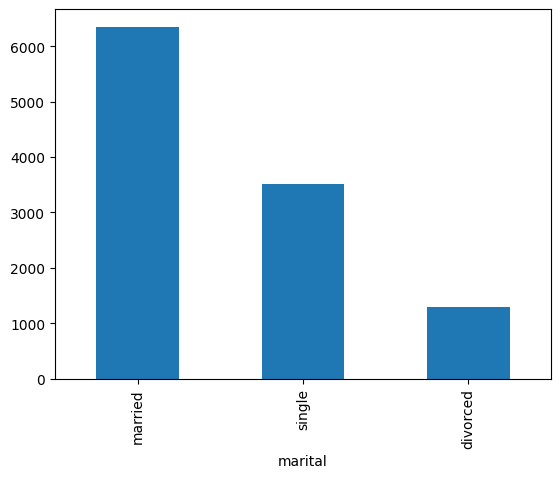

In [ ]:
print(df_original_250519['marital'].value_counts())
df_original_250519['marital'].value_counts().plot(kind='bar', rot=90)

##### Education

education
secondary    7910
tertiary     5341
primary      2210
unknown       702
Name: count, dtype: int64


<Axes: xlabel='education'>

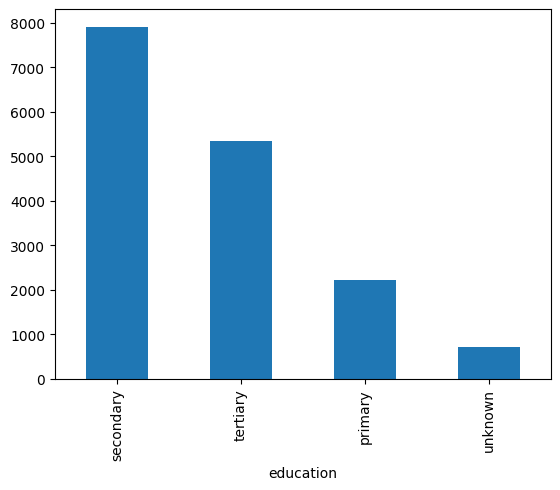

In [11]:
print(df_original_250519['education'].value_counts())
df_original_250519['education'].value_counts().plot(kind='bar', rot=90)

### Características de finanzas

##### Default

default
no     15932
yes      241
Name: count, dtype: int64


<Axes: xlabel='default'>

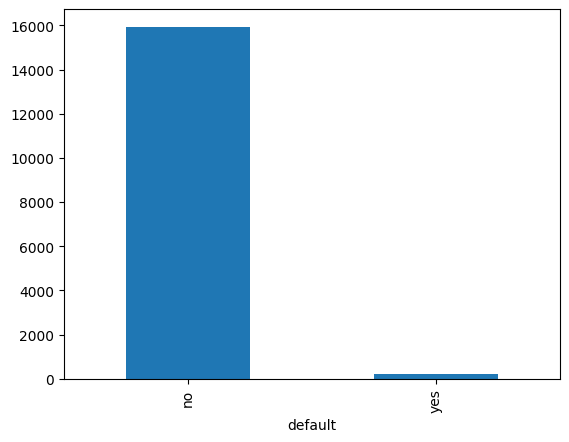

In [12]:
print(df_original_250519['default'].value_counts())
df_original_250519['default'].value_counts().plot(kind='bar', rot=90)

##### Balance

<Axes: >

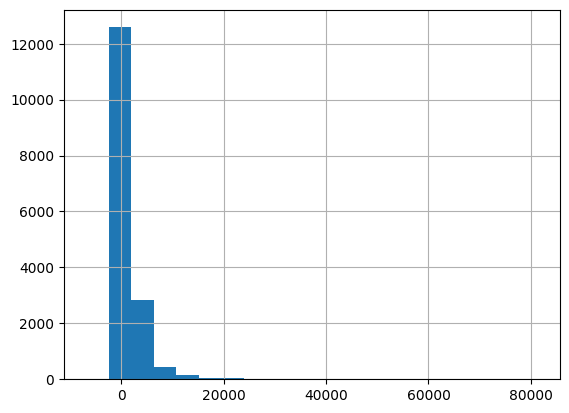

In [13]:
df_original_250519['balance'].hist(bins=20)

count    16173.000000
mean      1513.235207
std       3123.897733
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1693.000000
max      81204.000000
Name: balance, dtype: float64


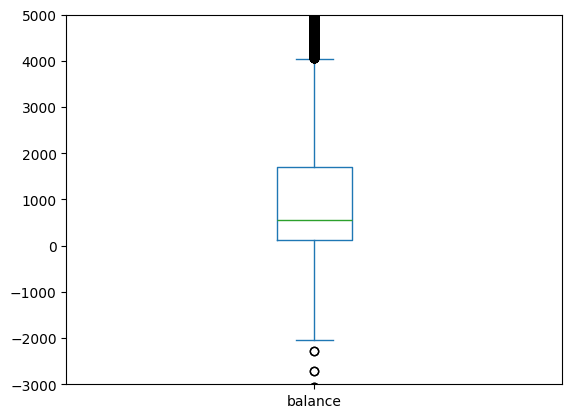

In [14]:
print(df_original_250519['balance'].describe())
df_original_250519['balance'].plot.box()
plt.ylim(-3000, 5000)
plt.show()

##### Housing

housing
no     5881
yes    5282
Name: count, dtype: int64


<Axes: xlabel='housing'>

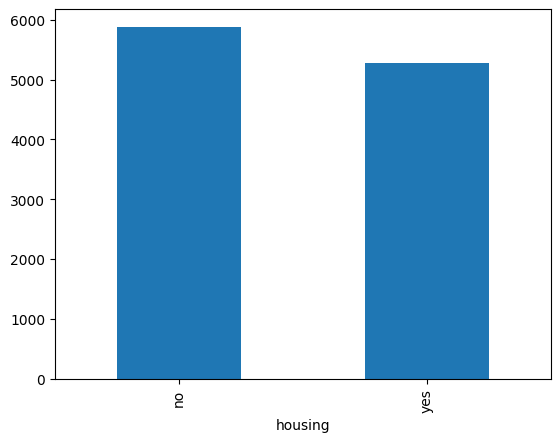

In [ ]:
print(df_original_250519['housing'].value_counts())
df_original_250519['housing'].value_counts().plot(kind='bar', rot=90)

##### Loan

loan
no     14054
yes     2119
Name: count, dtype: int64


<Axes: xlabel='loan'>

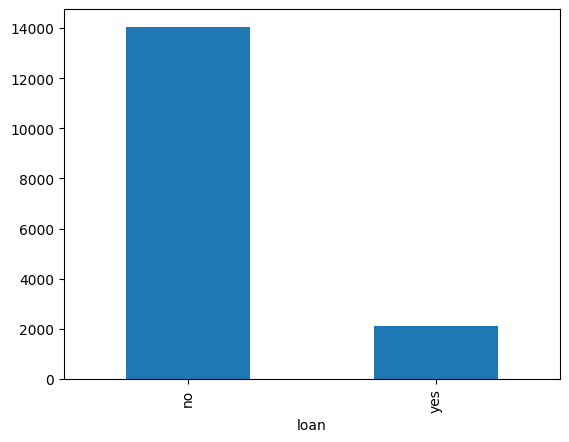

In [15]:
print(df_original_250519['loan'].value_counts())
df_original_250519['loan'].value_counts().plot(kind='bar', rot=90)

### Características contactos en campaña actual

##### Contact

contact
cellular     11667
unknown       3385
telephone     1121
Name: count, dtype: int64


<Axes: xlabel='contact'>

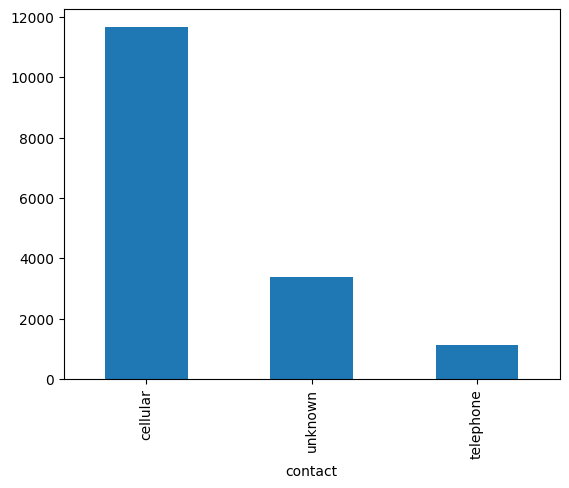

In [16]:
print(df_original_250519['contact'].value_counts())
df_original_250519['contact'].value_counts().plot(kind='bar', rot=90)

##### Day

day
1     173
2     496
3     430
4     592
5     680
6     657
7     545
8     630
9     515
10    242
11    542
12    654
13    657
14    672
15    659
16    521
17    600
18    812
19    537
20    822
21    651
22    391
23    350
24    177
25    335
26    380
27    416
28    607
29    552
30    686
31    192
Name: count, dtype: int64


<Axes: xlabel='day'>

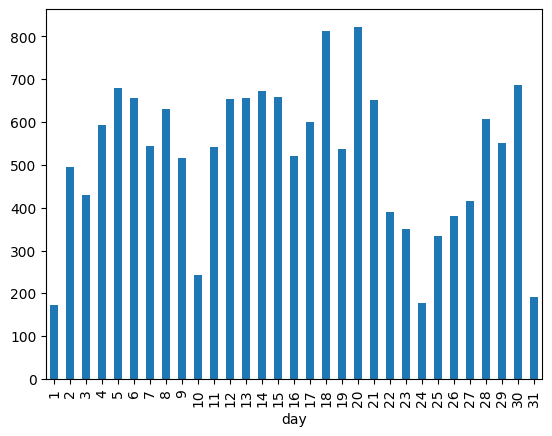

In [17]:
print(df_original_250519['day'].value_counts().sort_index())
df_original_250519['day'].value_counts().sort_index().plot(kind='bar', rot=90)

##### Month

month
jan     492
feb    1115
mar     405
apr    1335
may    4118
jun    1771
jul    2209
aug    2191
sep     463
oct     560
nov    1357
dec     157
Name: count, dtype: int64


<Axes: xlabel='month'>

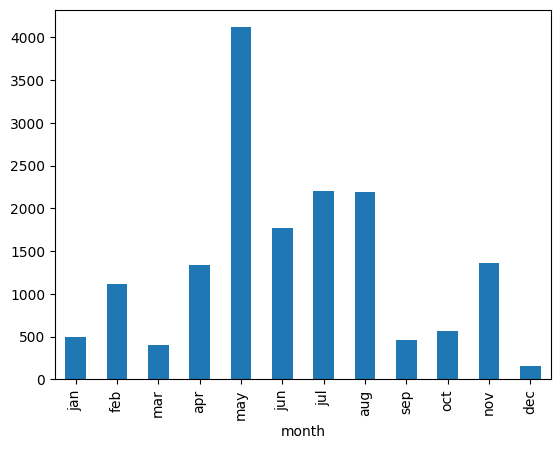

In [18]:
orden_meses = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
print(df_original_250519['month'].value_counts().reindex(orden_meses))
df_original_250519['month'].value_counts().reindex(orden_meses).plot(kind='bar', rot=90)

##### Duration

<Axes: >

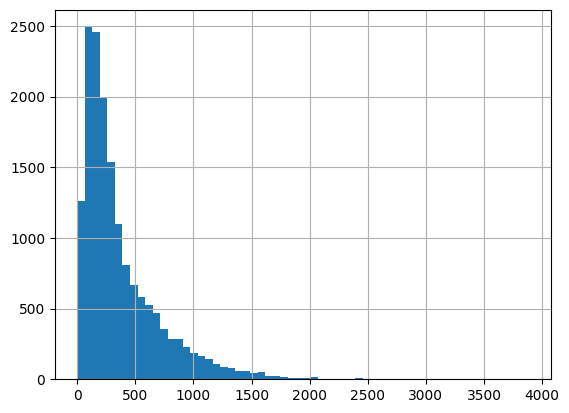

In [19]:
df_original_250519['duration'].hist(bins=60)

count    16173.000000
mean       373.960984
std        349.787596
min          2.000000
25%        138.000000
50%        256.000000
75%        499.000000
max       3881.000000
Name: duration, dtype: float64


<Axes: >

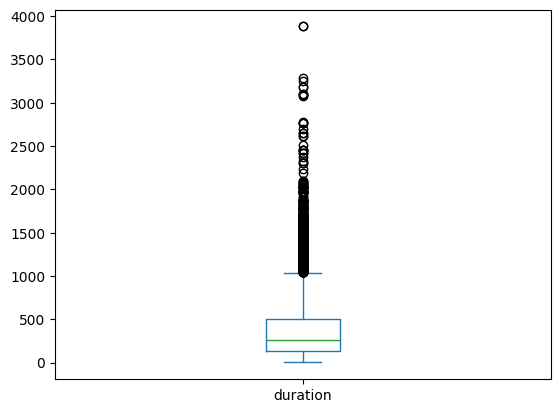

In [20]:
print(df_original_250519['duration'].describe())
df_original_250519['duration'].plot.box()

##### Campaign

<Axes: >

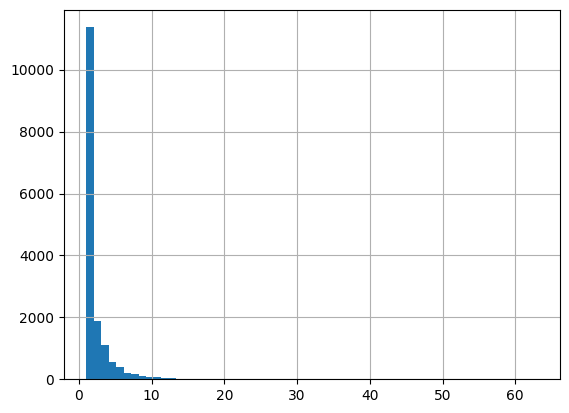

In [21]:
df_original_250519['campaign'].hist(bins=60)

count    16173.000000
mean         2.506338
std          2.736112
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64


<Axes: >

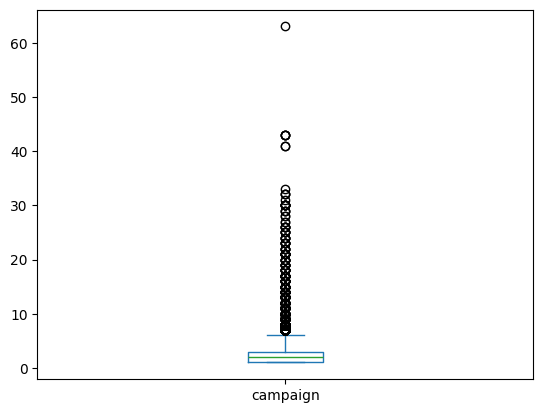

In [22]:
print(df_original_250519['campaign'].describe())
df_original_250519['campaign'].plot.box()

### Características campañas anteriores

##### Pdays

<Axes: >

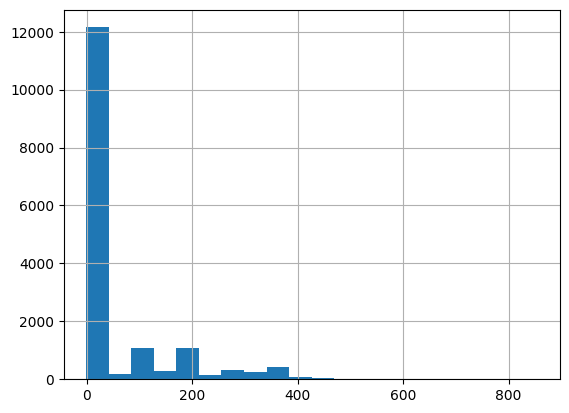

In [23]:
df_original_250519['pdays'].hist(bins=20)

count    16173.000000
mean        51.685649
std        109.264465
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         31.000000
max        854.000000
Name: pdays, dtype: float64


(-3.0, 55.0)

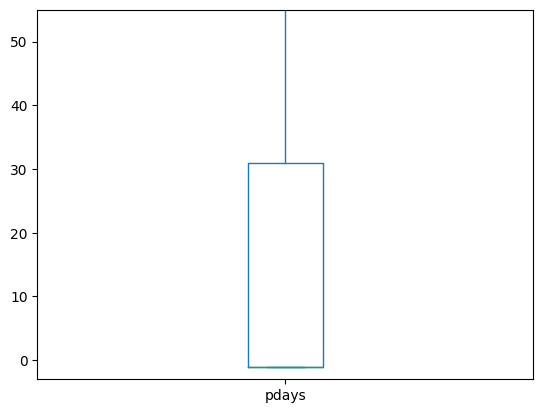

In [24]:
print(df_original_250519['pdays'].describe())
df_original_250519['pdays'].plot.box()
plt.ylim(-3, 55)

##### Previous

<Axes: >

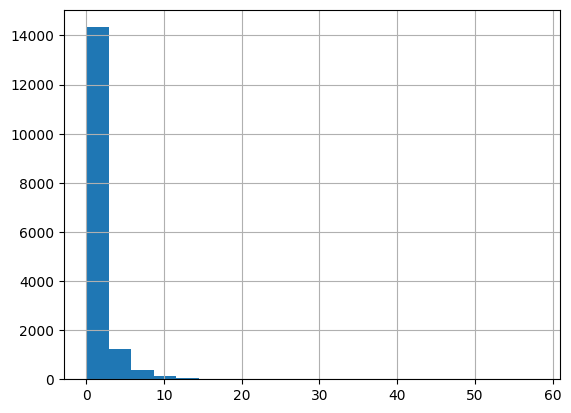

In [25]:
df_original_250519['previous'].hist(bins=20)

count    16173.000000
mean         0.846720
std          2.376494
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         58.000000
Name: previous, dtype: float64


(-1.0, 10.0)

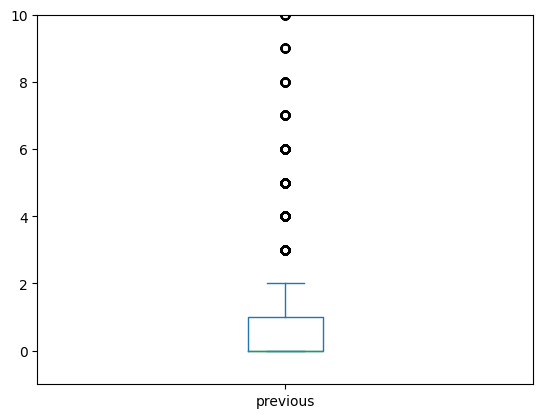

In [26]:
print(df_original_250519['previous'].describe())
df_original_250519['previous'].plot.box()
plt.ylim(-1, 10)

##### Poutcome

poutcome
unknown    12051
failure     1766
success     1555
other        801
Name: count, dtype: int64


<Axes: xlabel='poutcome'>

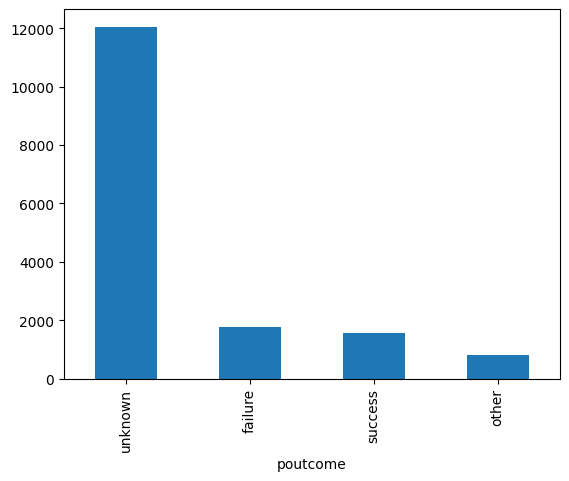

In [27]:
print(df_original_250519['poutcome'].value_counts())
df_original_250519['poutcome'].value_counts().plot(kind='bar', rot=90)

### Objetivo

##### Deposit

deposit
no     8455
yes    7718
Name: count, dtype: int64


<Axes: xlabel='deposit'>

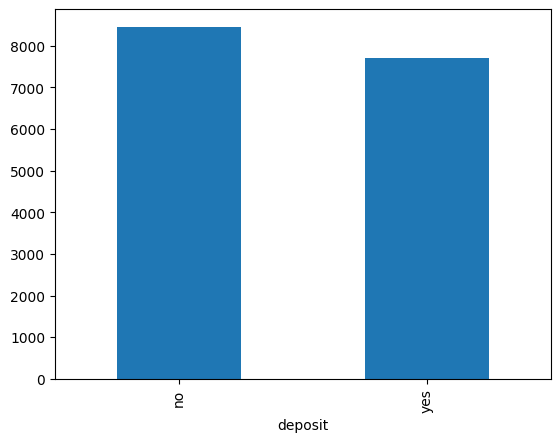

In [28]:
print(df_original_250519['deposit'].value_counts())
df_original_250519['deposit'].value_counts().plot(kind='bar', rot=90)

### Variables numéricas

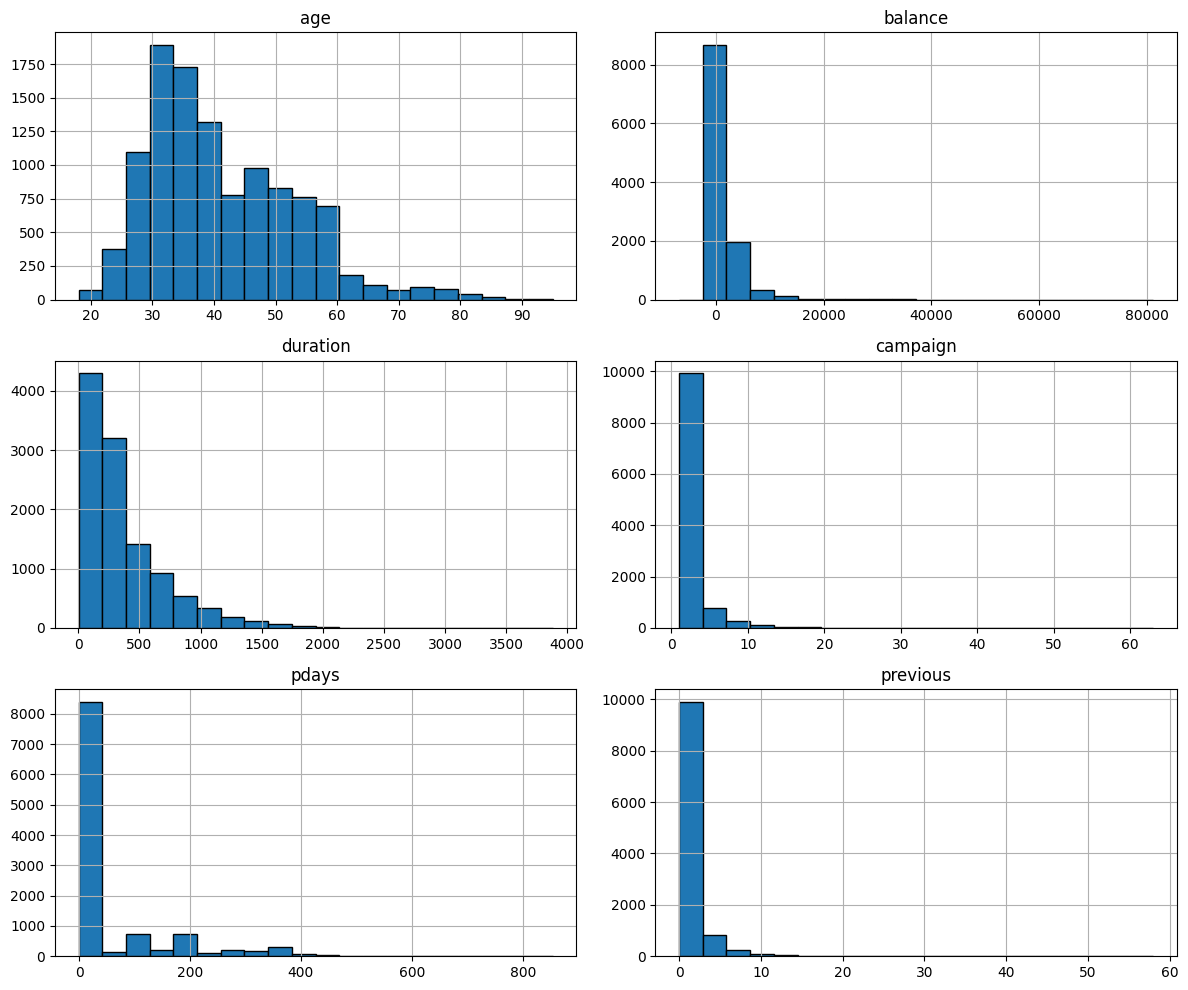

In [ ]:
# Histogramas de todas las variables numéricas
numericas = df_original_250519.select_dtypes(include='number').columns
numericas = numericas.drop(['id', 'day'])

df_original_250519[numericas].hist(bins=20, figsize=(12, 10), edgecolor='black')
plt.tight_layout()
plt.show()

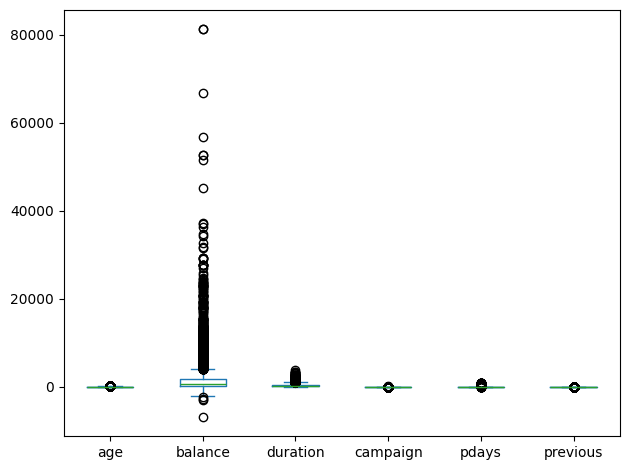

In [ ]:
# Boxplots de variables numéricas
df_original_250519[numericas].plot.box()
plt.tight_layout()
plt.show()

## **3. Análisis bivariado**

### Características personales

##### Age - deposit

<Axes: xlabel='deposit', ylabel='age'>

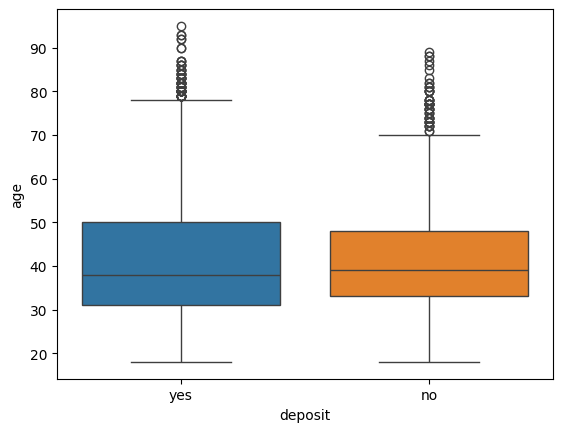

In [ ]:
sns.boxplot(data=df_original_250519, x='deposit', y='age', hue='deposit')

##### Job - deposit

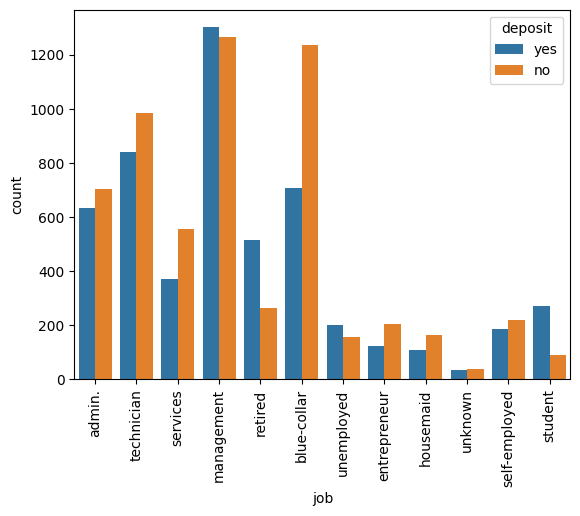

In [ ]:
sns.countplot(data=df_original_250519, x='job', hue='deposit')
plt.xticks(rotation=90)
plt.show()

##### Marital - deposit

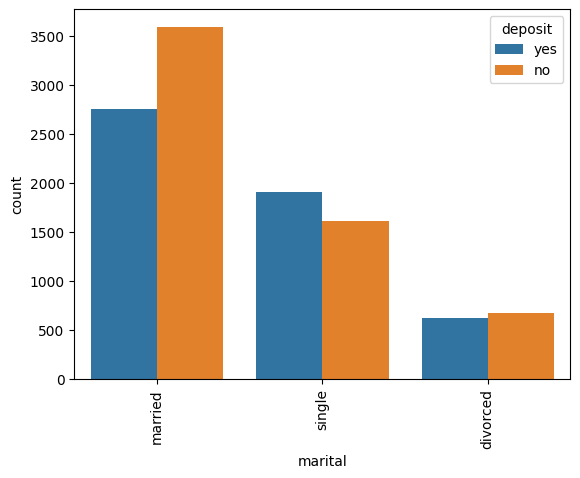

In [ ]:
sns.countplot(data=df_original_250519, x='marital', hue='deposit')
plt.xticks(rotation=90)
plt.show()

##### Education - deposit

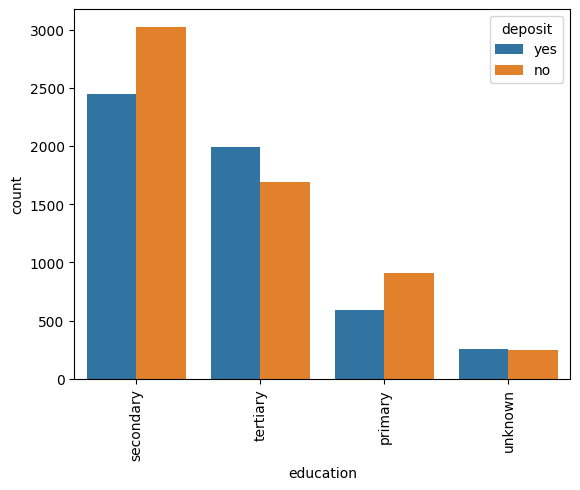

In [35]:
sns.countplot(data=df_original, x='education', hue='deposit')
plt.xticks(rotation=90)
plt.show()

### Características de finanzas

##### Default (impagos) - deposit

<Axes: xlabel='default', ylabel='count'>

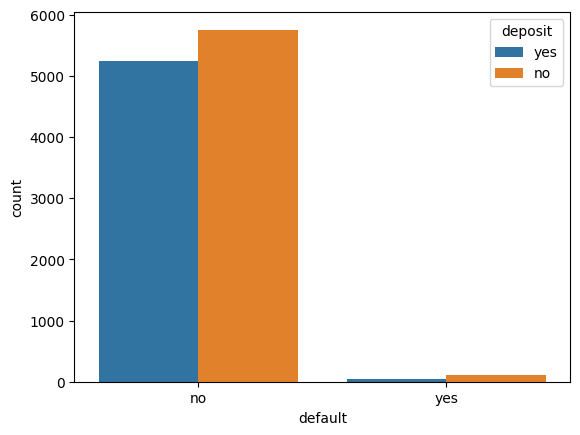

In [62]:
sns.countplot(data=df_original, x='default', hue='deposit')


##### Balance - deposit

(-8000.0, 20000.0)

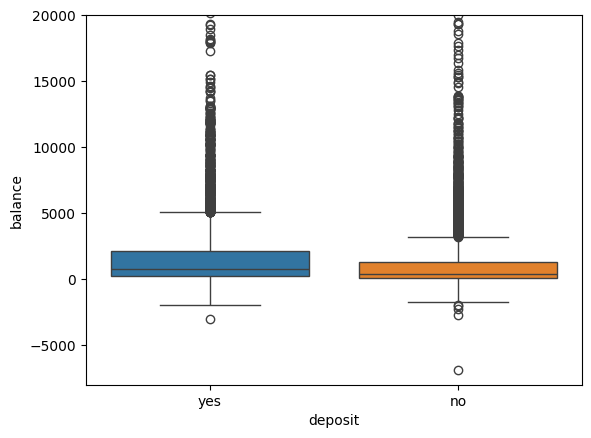

In [75]:
sns.boxplot(data=df_original, x='deposit', y='balance', hue='deposit')
plt.ylim(-8000, 20000)

##### Housing - deposit

<Axes: xlabel='housing', ylabel='count'>

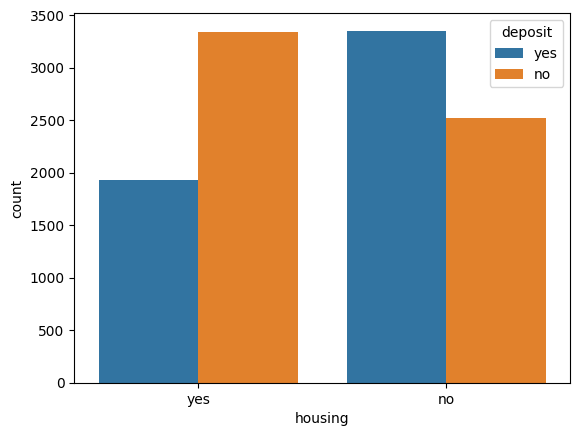

In [63]:
sns.countplot(data=df_original, x='housing', hue='deposit')

##### Loan - deposit

<Axes: xlabel='loan', ylabel='count'>

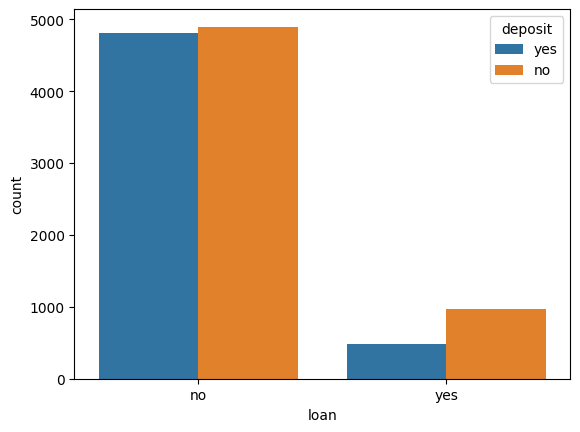

In [65]:
sns.countplot(data=df_original, x='loan', hue='deposit')

### Características contactos en campaña actual

##### Contact - deposit

<Axes: xlabel='contact', ylabel='count'>

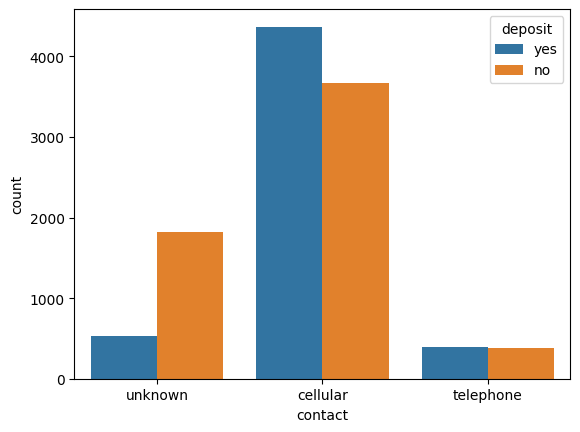

In [66]:
sns.countplot(data=df_original, x='contact', hue='deposit')

##### Day - deposit

<Axes: xlabel='day', ylabel='count'>

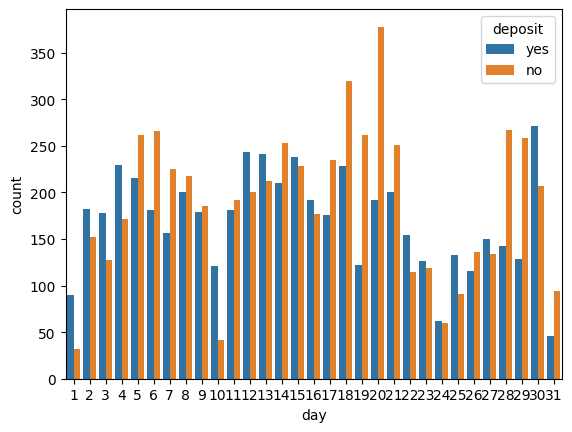

In [67]:
sns.countplot(data=df_original, x='day', hue='deposit')

##### Month - deposit

<Axes: xlabel='month', ylabel='count'>

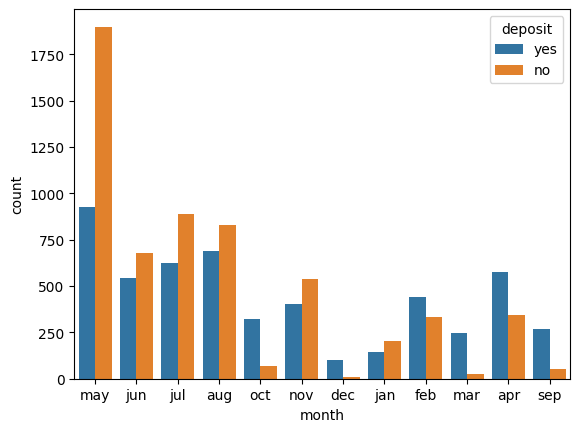

In [68]:
sns.countplot(data=df_original, x='month', hue='deposit')

##### Duration - deposit

<Axes: xlabel='deposit', ylabel='duration'>

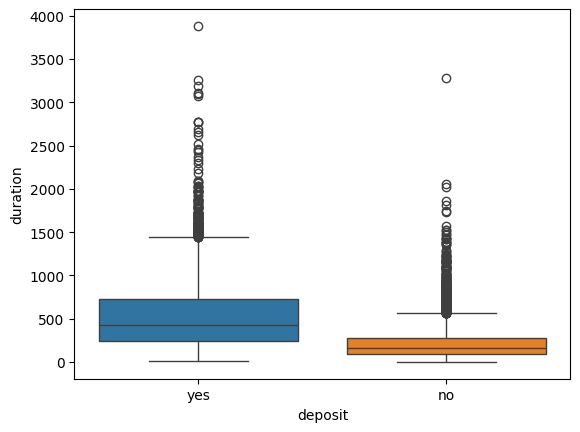

In [74]:
sns.boxplot(data=df_original, x='deposit', y='duration', hue='deposit')

##### Campaign - deposito

<Axes: xlabel='deposit', ylabel='campaign'>

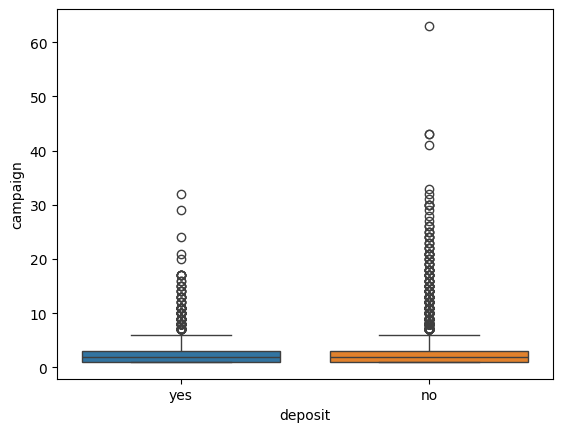

In [73]:
sns.boxplot(data=df_original, x='deposit', y='campaign', hue='deposit')

### Características campañas anteriores

##### Pdays - deposit

<Axes: xlabel='deposit', ylabel='pdays'>

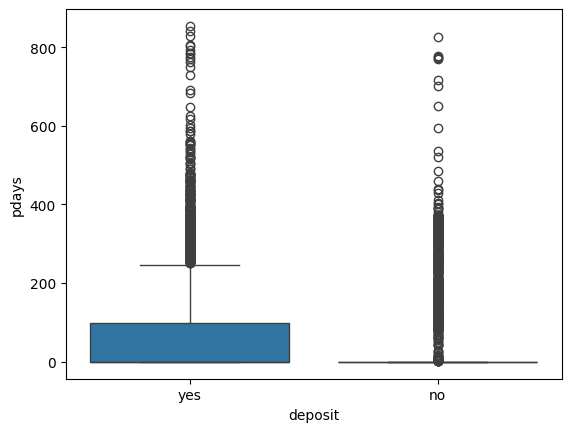

In [72]:
sns.boxplot(data=df_original, x='deposit', y='pdays', hue='deposit')

##### Previous - deposit

(-1.0, 10.0)

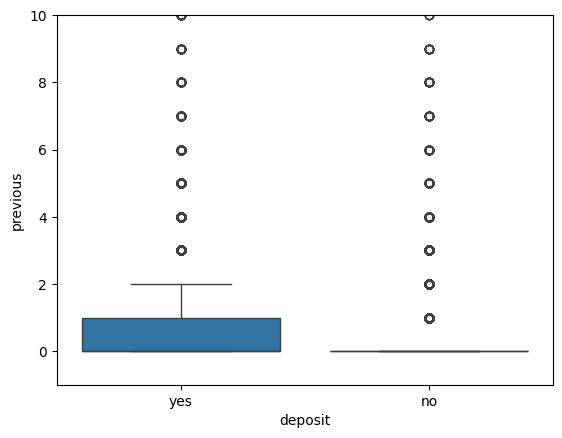

In [82]:
sns.boxplot(data=df_original, x='deposit', y='previous', hue='deposit')
plt.ylim(-1, 10)

##### Poutcome - deposit

<Axes: xlabel='poutcome', ylabel='count'>

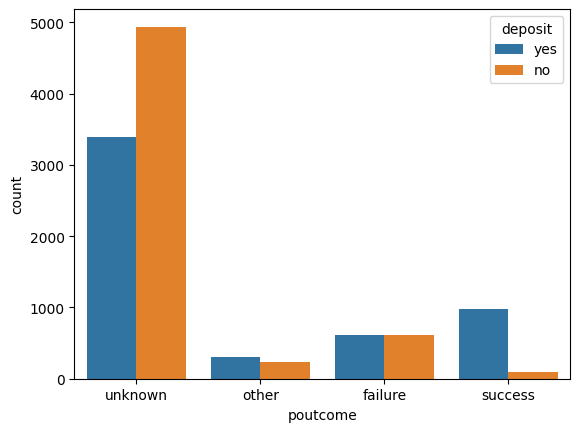

In [83]:
sns.countplot(data=df_original, x='poutcome', hue='deposit')

## **4. Correlación entre las variables numéricas**

               age   balance  duration  campaign     pdays  previous
age       1.000000  0.112239  0.000396 -0.005431  0.002528  0.020009
balance   0.112239  1.000000  0.022476 -0.013906  0.017400  0.030797
duration  0.000396  0.022476  1.000000 -0.041646 -0.027470 -0.026774
campaign -0.005431 -0.013906 -0.041646  1.000000 -0.102700 -0.049680
pdays     0.002528  0.017400 -0.027470 -0.102700  1.000000  0.507279
previous  0.020009  0.030797 -0.026774 -0.049680  0.507279  1.000000


<Axes: >

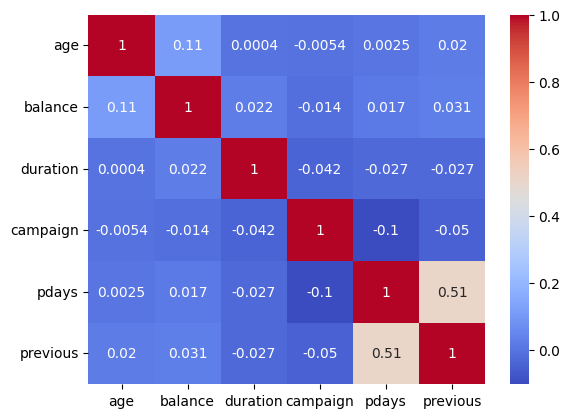

In [ ]:
numericas = df_original_250519.select_dtypes(include='number').drop(columns=['id', 'day'])
print(numericas.corr())
sns.heatmap(numericas.corr(), annot=True, cmap='coolwarm')

La única correlación significativa se da entre pdays y previous, pero no tiene sentido ya que "repiten" información (si se contactó a un cliente hace poco días, es más probable que haya un contacto previo). No tiene mucho sentido comparar las variables numéricas entre ellas.

##### Comparar numéricas con deposit
- Convertir deposit a 1 / 0.

               age   balance  duration  campaign     pdays  previous   deposit
age       1.000000  0.109797 -0.000742 -0.010770  0.008382  0.022141  0.038101
balance   0.109797  1.000000  0.024010 -0.020944  0.022421  0.034876  0.086477
duration -0.000742  0.024010  1.000000 -0.041367 -0.029104 -0.032718  0.452490
campaign -0.010770 -0.020944 -0.041367  1.000000 -0.101840 -0.045730 -0.128763
pdays     0.008382  0.022421 -0.029104 -0.101840  1.000000  0.505833  0.149854
previous  0.022141  0.034876 -0.032718 -0.045730  0.505833  1.000000  0.136324
deposit   0.038101  0.086477  0.452490 -0.128763  0.149854  0.136324  1.000000


<Axes: >

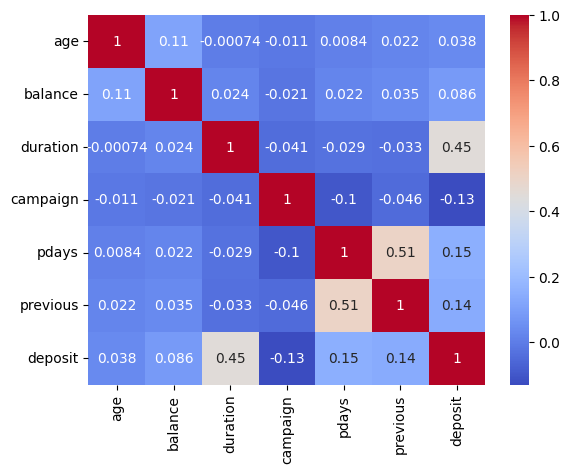

In [29]:
df_copy = df_original_250519.copy()
df_copy['deposit'] = df_copy['deposit'].map({'yes': 1, 'no': 0})

numericas = df_copy.select_dtypes(include='number').drop(columns=['id', 'day'])
print(numericas.corr())

sns.heatmap(numericas.corr(), annot=True, cmap='coolwarm')

Si nos fijamos solo en la correlación de cada variable con `deposit`, vemos que `duration` presenta una correlacón de **0.45**.
> Cuanto más dura la llamada, más probable es que el cliente acepte el depósito.